In [1]:
%load_ext autoreload

In [2]:
import json

In [3]:
with open('single_lr_drop/log.txt') as f:
	results = [json.loads(entry) for entry in  f.readlines()]

In [4]:
import matplotlib.pyplot as plt

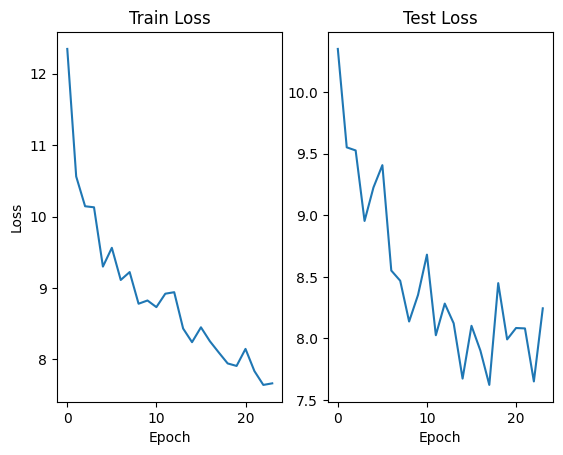

In [5]:
train_losses = [entry['train_loss'] for entry in results]
test_loss = [entry['test_loss'] for entry in results]

fig, axs = plt.subplots(1, 2)

axs[0].set_title('Train Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].plot(train_losses)

axs[1].set_title('Test Loss')
axs[1].set_xlabel('Epoch')
axs[1].plot(test_loss)

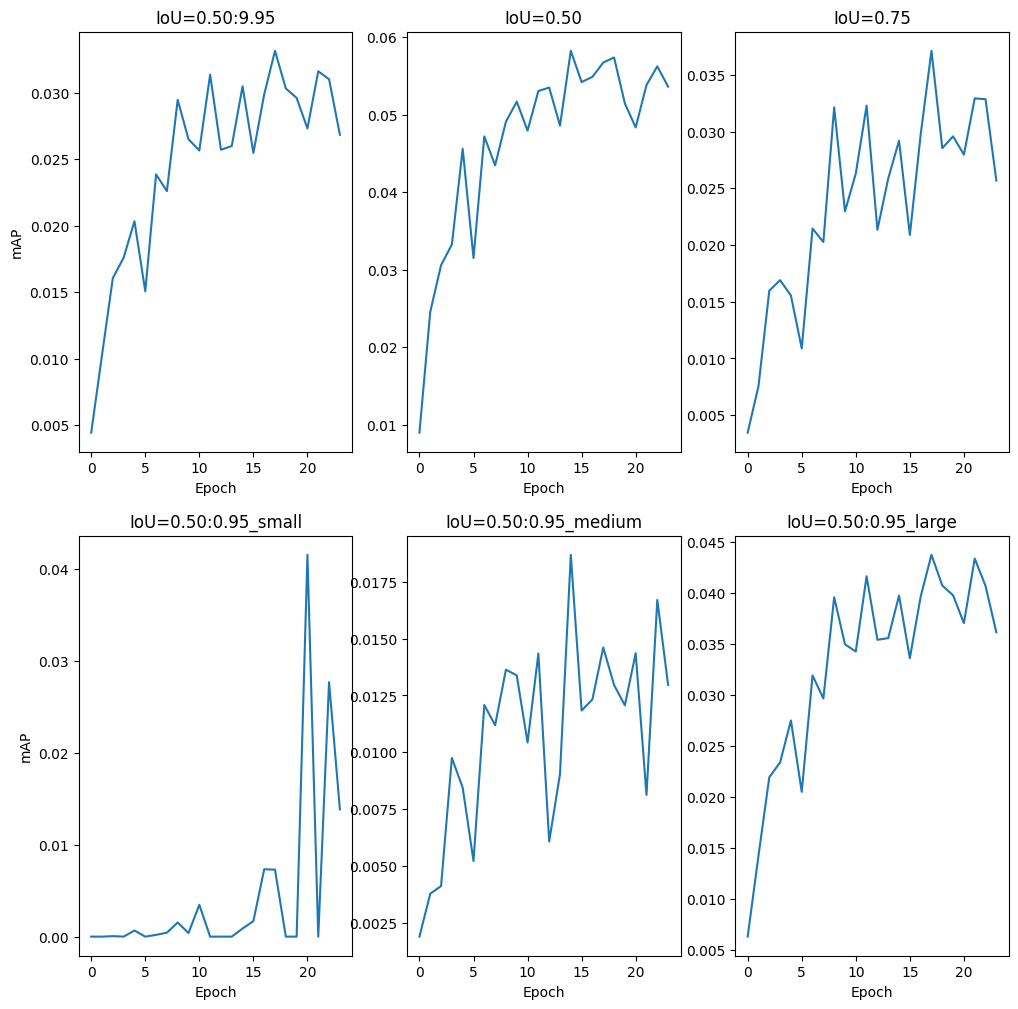

In [6]:
AP = [entry['test_coco_eval_bbox'] for entry in results]
AP = [[values[i] for values in AP] for i in range(6)]

fig, axs = plt.subplots(2, 3, figsize=(12, 12))
axs[0, 0].set_ylabel('mAP')
axs[1, 0].set_ylabel('mAP')

metrics = ['IoU=0.50:9.95', 'IoU=0.50', 'IoU=0.75', 'IoU=0.50:0.95_small', 'IoU=0.50:0.95_medium', 'IoU=0.50:0.95_large']

for i, data in enumerate(AP):
	metric = metrics[i]
	axs[i // 3, i % 3].set_title(metric)
	axs[i // 3, i % 3].set_xlabel('Epoch')
	axs[i // 3, i % 3].plot(data, label=metric)